In [1]:
import pandas as pd

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
new = pd.read_csv("insurance.csv")
df = new.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
df.isnull().values.any()

False

In [12]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


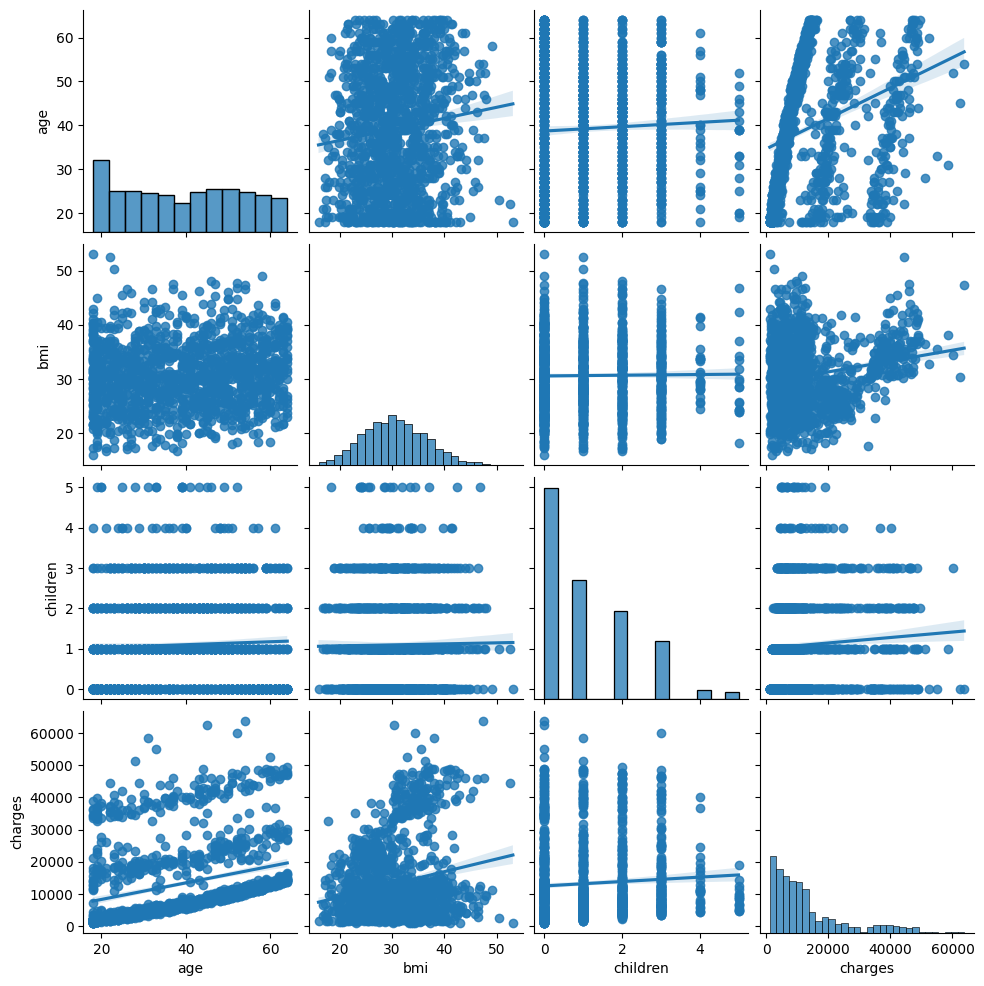

In [13]:
import seaborn as sns
sns.pairplot(numeric_df, kind  ="reg");

Age and Charges have bigger corelassion

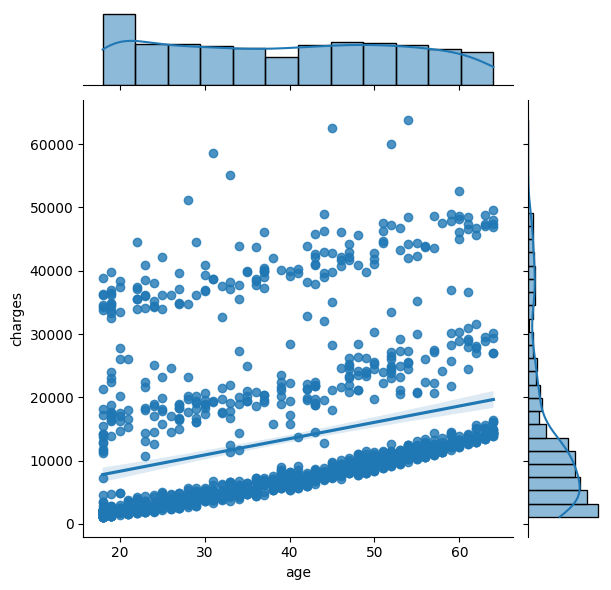

In [15]:
sns.jointplot(x = "age", y = "charges", data = df, kind = "reg")

Simple Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = df[["age"]]
y = df["charges"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_

3165.8850060630284

In [18]:
model.coef_

array([257.72261867])

In [19]:
model.score(X,y)

0.08940589967885804

In [20]:
model.predict(X)[0:10]

array([ 8062.61476073,  7804.89214207, 10382.11832874, 11670.73142207,
       11413.0088034 , 11155.28618474, 15021.12546474, 12701.62189674,
       12701.62189674, 18629.24212608])

In [21]:
y[0:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [22]:
new_bmi = [[20],[25],[30],[35]]
model.predict(new_bmi)

array([ 8320.3373794 ,  9608.95047274, 10897.56356607, 12186.1766594 ])

In [23]:
model.predict([[32]])

array([11413.0088034])

Hata Tespiti

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
reg.predict(X)[0:10]

array([ 8062.61476073,  7804.89214207, 10382.11832874, 11670.73142207,
       11413.0088034 , 11155.28618474, 15021.12546474, 12701.62189674,
       12701.62189674, 18629.24212608])

In [28]:
y[0:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [29]:
k_t = pd.DataFrame({"real_y": y[0:10],
                   "predict_y": reg.predict(X)[0:10]})

k_t

,real_y,predict_y
0,16884.92400,8062.614761
1,1725.55230,7804.892142
2,4449.46200,10382.118329
3,21984.47061,11670.731422
4,3866.85520,11413.008803
5,3756.62160,11155.286185
6,8240.58960,15021.125465
7,7281.50560,12701.621897
8,6406.41070,12701.621897
9,28923.13692,18629.242126


In [30]:
k_t["error"] = k_t["real_y"] - k_t["predict_y"]
k_t

,real_y,predict_y,error
0,16884.92400,8062.614761,8822.309239
1,1725.55230,7804.892142,-6079.339842
2,4449.46200,10382.118329,-5932.656329
3,21984.47061,11670.731422,10313.739188
4,3866.85520,11413.008803,-7546.153603
5,3756.62160,11155.286185,-7398.664585
6,8240.58960,15021.125465,-6780.535865
7,7281.50560,12701.621897,-5420.116297
8,6406.41070,12701.621897,-6295.211197
9,28923.13692,18629.242126,10293.894794


In [31]:
k_t["error_square"] = k_t["error"]**2
k_t

,real_y,predict_y,error,error_square
0,16884.92400,8062.614761,8822.309239,7.783314e+07
1,1725.55230,7804.892142,-6079.339842,3.695837e+07
2,4449.46200,10382.118329,-5932.656329,3.519641e+07
3,21984.47061,11670.731422,10313.739188,1.063732e+08
4,3866.85520,11413.008803,-7546.153603,5.694443e+07
5,3756.62160,11155.286185,-7398.664585,5.474024e+07
6,8240.58960,15021.125465,-6780.535865,4.597567e+07
7,7281.50560,12701.621897,-5420.116297,2.937766e+07
8,6406.41070,12701.621897,-6295.211197,3.962968e+07
9,28923.13692,18629.242126,10293.894794,1.059643e+08


In [32]:
import numpy as np

In [34]:
np.sum(k_t["error_square"])

588993093.5467993

In [35]:
np.mean(k_t['error_square'])

58899309.35467993

In [36]:
np.sqrt(np.mean(k_t["error_square"]))

7674.588546279203

Multiple Linear Regression

In [24]:
df_new = df.copy()
df_new['sex'] = df_new['sex'].map({'female': 0, 'male': 1})
df_new['smoker'] = df_new['smoker'].map({'yes': 1, 'no': 0})
df_new['region'] = df_new['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [25]:
df_new.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [38]:
X = df_new.drop("charges", axis = 1)
y = df_new["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 6)
y_train (1070,)
X_test (268, 6)
y_test (268,)
training (1338, 7)


In [39]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [40]:
model.intercept_

-12760.459365293491

In [41]:
model.coef_

array([ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
        2.36478181e+04,  2.71284266e+02])

In [42]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,2
1285,47,0,24.320,0,0,3
1142,52,0,24.860,0,0,1
969,39,0,34.320,5,0,1
486,54,0,21.470,3,0,2
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,3
1130,39,0,23.870,5,0,1
1294,58,1,25.175,0,0,3
860,37,0,47.600,2,1,0


Predict

In [46]:
new_data = [[60],[1],[40],[5],[1],[2]]
new_data = pd.DataFrame(new_data).T

In [47]:
model.predict(new_data)

array([42391.22854432])

In [51]:
new_2 = [[44.5], [39.3],[65.1],[33.6],[56.8],[25.3]]
new_2 = pd.DataFrame(new_2).T

In [52]:
model.predict(new_2)

array([1384142.04789003])

In [53]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [54]:
rmse

6105.789320191615

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [56]:
rmse

5799.587091438355

PCR

In [58]:
df_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [57]:
y = df_new['charges']

Choose only numeric columns (We completed it before)

In [71]:
X_ = df_new.drop(["charges"], axis = 1).astype("float64")

In [72]:
X_.head()

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.900,0.0,1.0,0.0
1,18.0,1.0,33.770,1.0,0.0,1.0
2,28.0,1.0,33.000,3.0,0.0,1.0
3,33.0,1.0,22.705,0.0,0.0,2.0
4,32.0,1.0,28.880,0.0,0.0,2.0


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df_new.copy()

print("training", training.shape)

X_train (1003, 6)
y_train (1003,)
X_test (335, 6)
y_test (335,)
training (1338, 7)


In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [75]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [76]:
X_reduced_train[0:1,:]

array([[ 1.53063702, -0.69384237,  0.69471134, -1.09245862,  0.46619095,
        -0.22326591]])

In [77]:
X_reduced_train.shape

(1003, 6)

In [78]:
X_reduced_train[:,0]

array([ 1.53063702,  0.32786621, -2.10505606, ...,  0.88534874,
       -2.49682216, -1.1251216 ])

In [79]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5] # How much ½ data from dataset

array([20.24, 38.06, 55.54, 71.49, 86.71])

In [80]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10] 

array([ 20.24,  38.06,  55.54,  71.49,  86.71, 100.  ])

In [81]:
lm = LinearRegression()

In [82]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [83]:
pcr_model.intercept_

13267.935817337986

In [84]:
pcr_model.coef_

array([-1378.37950838,  6372.83303483,  2993.03295215,  3664.44312489,
       -6610.57549335,  -498.63818834])

Predict

In [85]:
y_pred = pcr_model.predict(X_reduced_train)

In [86]:
y_pred[0:5]

array([ 1841.97541608,  4351.61796476, 14096.02955164, 35757.94247423,
        9535.81973333])

In [87]:
np.sqrt(mean_squared_error(y_train, y_pred))

6083.690704100102

In [88]:
df_new["charges"].mean()

13270.422265141257

In [89]:
pca2 = PCA()

In [90]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [91]:
y_pred = pcr_model.predict(X_reduced_test)

In [92]:
np.sqrt(mean_squared_error(y_test, y_pred))

17095.308665153145

Model Tuning

In [93]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

17095.308665153145


In [94]:
from sklearn import model_selection

In [95]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [96]:
lm = LinearRegression()

In [97]:
RMSE = []

In [98]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [99]:
import matplotlib.pyplot as plt

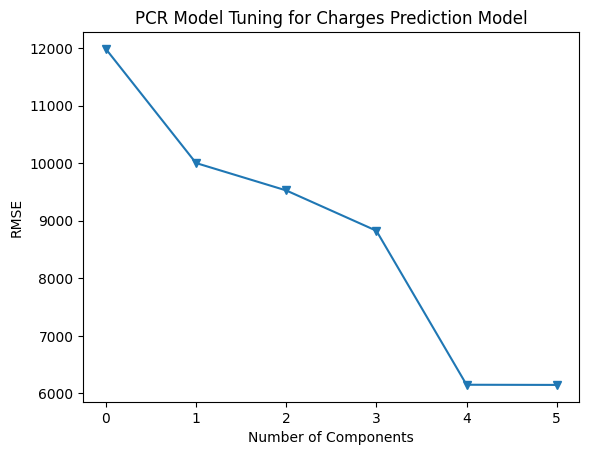

In [100]:
plt.plot(RMSE, '-v')
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning for Charges Prediction Model');

In [101]:
lm = LinearRegression()

In [102]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

6083.690704100102


In [103]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [104]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

17095.308665153145


PLS Model

In [105]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
dms_bool = pd.get_dummies(df[['sex', 'smoker', 'region']], dtype=bool)
dms = dms_bool.astype(int)
dms

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [120]:
y= df['charges']
X_ = df.drop(['charges', 'sex', 'smoker','region'], axis=1).astype('float64')
X = pd.concat([X_, dms[['sex_female', 'smoker_yes','region_northwest']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [121]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [122]:
pls_model = PLSRegression().fit(X_train, y_train)

In [123]:
pls_model.coef_

array([[3616.9716217 , 1956.55318527,  543.48551401,  -41.12339326,
        9567.13532081,   83.71995218]])

Predict

In [124]:
X_train.head()

,age,bmi,children,sex_female,smoker_yes,region_northwest
693,24.0,23.655,0.0,0,0,1
1297,28.0,26.510,2.0,1,0,0
634,51.0,39.700,1.0,0,0,0
1022,47.0,36.080,1.0,0,1,0
178,46.0,28.900,2.0,1,0,0


In [125]:
pls_model.predict(X_train)[0:10]

array([ 1934.20864811,  4519.35154579, 14367.78962785, 35829.65117716,
        9934.45189714, 12734.38687111,  4961.20427039,  5101.56056154,
        4374.18294202,  2213.66040301])

In [126]:
y_train[0:10]

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
287     14256.19280
1290     7133.90250
1113     5312.16985
294      3906.12700
471      2203.47185
Name: charges, dtype: float64

In [127]:
y_pred = pls_model.predict(X_train)

In [128]:
np.sqrt(mean_squared_error(y_train, y_pred))

6092.293142207706

In [129]:
y_pred = pls_model.predict(X_test)

In [130]:
np.sqrt(mean_squared_error(y_test, y_pred))

5946.75274381484

In [132]:
df["charges"].mean()

13270.422265141257

Model Tuning

Text(0.5, 1.0, 'Charge')

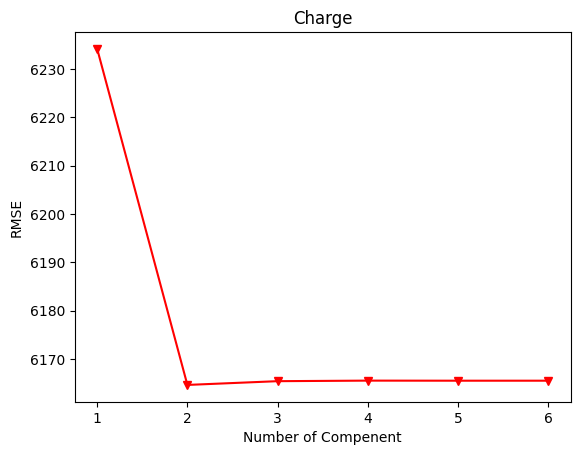

In [133]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Loop for calculating errors
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Viualizing the results
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Number of Compenent')
plt.ylabel('RMSE')
plt.title('Charge')

In [134]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [135]:
y_pred = pls_model.predict(X_test)

In [136]:
np.sqrt(mean_squared_error(y_test, y_pred))

5946.75274381484

Ridge Regression

In [137]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [139]:
df= df.dropna()
dms = pd.get_dummies(df[['sex', 'smoker', 'region']])
dms=dms.astype(int)
dms


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [140]:
y = df["charges"]
X_ = df.drop(['sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, dms[['sex_male', 'smoker_no', 'region_southeast']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [141]:
from sklearn.linear_model import Ridge

In [142]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [143]:
ridge_model

Ridge(alpha=0.1)

In [144]:
ridge_model.coef_

array([ 6.96242546e-10,  8.95981230e-10,  1.15618410e-09,  1.00000000e+00,
        1.55191640e-10, -6.34063033e-08, -9.61814359e-10])

10**np.linspace(10,-2,100)*0.5 

Text(0.5, 1.0, 'Ridge Coefficients as a Function of Regularization')

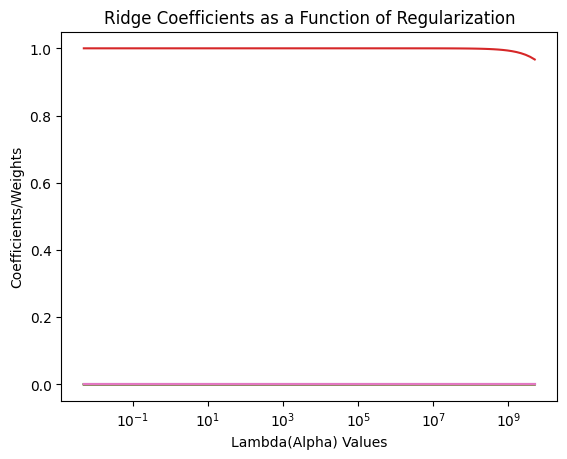

In [145]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
coefficients = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    coefficients.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, coefficients) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Values')
plt.ylabel('Coefficients/Weights')
plt.title('Ridge Coefficients as a Function of Regularization')

Predict

In [146]:
y_pred = ridge_model.predict(X_test)

In [151]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.975123338815686e-10

Model Tuning

In [148]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [149]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [152]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error")

"normalize=True gave me error"

In [153]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [154]:
ridge_cv.alpha_

0.005

In [156]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_train,y_train)

normalize=True again game me error

In [157]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

7.975123338815686e-10

Lasso Regression

In [159]:
dms = pd.get_dummies(df[['sex', 'smoker', 'region']])
dms=dms.astype(int)
y = df["charges"]
X_ = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, dms[['sex_female', 'smoker_yes', 'region_southwest']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [160]:
from sklearn.linear_model import Lasso

In [161]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [162]:
lasso_model.coef_

array([  260.29095865,   328.23969448,   432.18377678,   -59.62288885,
       23614.93794724,  -473.2201655 ])

Text(0, 0.5, 'weights')

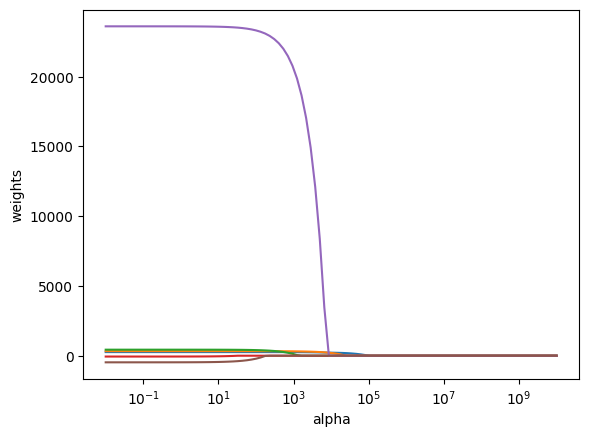

In [163]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
coefficients = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefficients.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, coefficients)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Predict

In [164]:
lasso_model.predict(X_test)

array([ 8634.77366685,  7018.10880519, 36892.16215251,  9573.96791699,
       26891.3787637 , 10743.84065296,   129.72360099, 16954.04852733,
         757.28982519, 11321.5066932 , 28109.54797119,  9430.65066672,
        5487.11280277, 38639.32599113, 40517.46531883, 37348.13581481,
       15421.77335339, 36098.09545493,  9406.56997036, 31426.05202079,
        3893.402937  , 10137.77420443,  2304.29631534,  6585.86079457,
       11335.07813714, 12576.46364827, 14459.32929534,  6096.77259154,
        9623.09714879,  2431.88320163,  9078.45500137, 13076.69158545,
        4705.70694364,  3447.54066015,  4427.2209249 , 12632.17573244,
        1884.48034264,  8759.7203637 , 33296.55406715, 32825.13503548,
        3814.7608603 ,  4302.40084334, 14080.11702364, 11567.65073622,
        9042.03982103, 12196.22332424,  5163.05727603,  3100.70837238,
       35764.28386436,  9388.01069716, 16107.30997018,  2611.32241365,
       12233.38893369,  1114.00082828, 13731.08791978, 12272.19363021,
      

In [165]:
y_pred = lasso_model.predict(X_test)

In [166]:
np.sqrt(mean_squared_error(y_test, y_pred))

5948.698208492477

Modeling

In [167]:
from sklearn.linear_model import LassoCV

In [169]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000)

In [170]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000)

In [171]:
lasso_cv_model.alpha_

57.024103770565794

In [172]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [173]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=57.024103770565794)

In [174]:
y_pred = lasso_tuned.predict(X_test)

In [175]:
np.sqrt(mean_squared_error(y_test, y_pred))

5957.6962543923555

Elasticnet Regression

In [176]:
dms = pd.get_dummies(df[['sex', 'smoker', 'region']])
dms=dms.astype(int)
y = df["charges"]
X_ = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1).astype('float64')
X = pd.concat([X_, dms[['sex_female', 'smoker_yes', 'region_southwest']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [177]:
from sklearn.linear_model import ElasticNet

In [178]:
enet_model = ElasticNet().fit(X_train, y_train)

In [179]:
enet_model.coef_

array([ 240.20678365,  326.74118106,  443.7639968 , -280.24450317,
       5801.80239187, -245.07272114])

In [180]:
enet_model.intercept_

-7613.492199767941

Predict

In [181]:
enet_model

ElasticNet()

In [182]:
enet_model.predict(X_test)

array([12028.80578816, 10562.47776395, 22065.73649538, 13179.26354498,
       13181.81758097, 14769.42638758,  4026.76987803, 20144.86642199,
        4481.40825983, 14862.13667416, 14453.21778879, 13117.52665218,
        9184.29556735, 24406.6032484 , 25970.96634016, 23088.85860782,
       18709.23729726, 21610.07797959, 12764.62947056, 17021.39403874,
        8174.53888175, 14009.61727228,  6638.29587274, 10396.74524956,
       14635.85648144, 15755.33141127, 17742.2130502 ,  9856.07035032,
       12974.82553847,  6558.20910315, 12818.03451426, 16196.58805241,
        8544.07073736,  7162.24535916,  8632.81088267, 16201.74577666,
        5975.26420943, 12403.40758344, 18726.84713456, 18780.8079737 ,
        7988.73722768,  8358.15706364, 17453.86873915, 14877.53850541,
       12881.85687727, 15742.78179045,  9026.43966645,  7137.4628574 ,
       21601.37416227, 13264.04002797, 19099.99553956,  6750.38239054,
       15691.91835947,  5246.34326119, 17087.7865486 , 15776.03430024,
      

In [183]:
y_pred = enet_model.predict(X_test)

In [184]:
np.sqrt(mean_squared_error(y_test, y_pred))

9529.123399773713

Model Tuning

In [185]:
from sklearn.linear_model import ElasticNetCV

In [186]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [187]:
enet_cv_model.alpha_

99.19331475924518

In [188]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [189]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [191]:
y_pred = enet_tuned.predict(X_test)
y_pred

array([13624.96812088, 12523.46963589, 17625.45832665, 13924.99074869,
        9552.55665252, 13999.44291018,  8122.98928407, 19133.97252755,
        9133.60857411, 14933.94195288, 10677.037409  , 13623.86125521,
       11111.1922396 , 16382.50738518, 18860.47805133, 16070.85679423,
       16917.39867689, 15716.8583648 , 14214.6000845 , 13519.03535671,
        9587.67912608, 14300.48944292,  9255.56350007, 11189.04442544,
       15043.20041468, 16424.71048968, 17942.30936541, 10872.64646001,
       14220.40409601,  9025.43303745, 13272.47058868, 16888.73349859,
       10285.81083141,  9960.72577584, 10585.20348176, 15691.10155714,
        9086.68970321, 13890.56417239, 14902.05116139, 13365.3560802 ,
        9083.8592968 ,  9999.31863851, 17278.70825898, 16371.61293326,
       12799.46477594, 16679.64847147, 10144.37853259,  9604.10735346,
       14880.96977289, 12786.95856761, 18703.72185531,  8933.20656454,
       14958.62321324,  8449.67337849, 17071.29842558, 15601.72809187,
      

In [192]:
np.sqrt(mean_squared_error(y_test, y_pred))

11544.360790550978